## Script Clase 1 - clase 1 annalisis calitativo

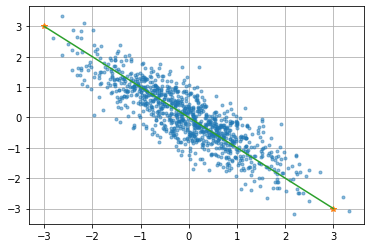

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generemos una estructura de dependencia: Normal Bivariante
mu = [0, 0] # Vector de medias
rho = -0.85 # Cantidad de correlación

sigma  = [[1, rho], 
          [rho, 1]] ## Matriz de covarianzas

n = 1000 # Cantidad de datos, tamño de muestra
X = np.random.multivariate_normal(mu, sigma, n) ### Estos son mis datos simulados

plt.plot(X[:, 0], X[:, 1], '.', alpha = 0.5) ## Así hacemos un scatter plot, 
### '.' este parametro me indica que el grafico son puntos, alpha le da transparencia a los puntos, 1 es solido, 0 es totalmente transparente
plt.plot([-3, 3], [3, -3], "*")
plt.plot([-3, 3], [3, -3])
plt.grid() ## Agregando una malla

Text(0.5, 1.0, 'Rho = -0.85')

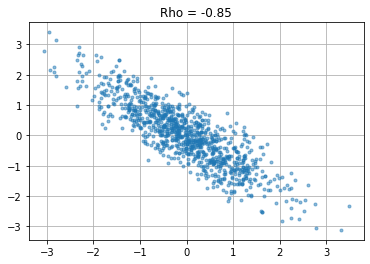

In [2]:
sigma  = [[1, rho], [rho, 1]] ## Matriz de covarianzas
X = np.random.multivariate_normal(mu, sigma, n) ### Estos son mis datos simulados
plt.plot(X[:, 0], X[:, 1], '.', alpha = 0.5)
plt.grid()
plt.title("Rho = {}".format(np.round(rho, 2)))


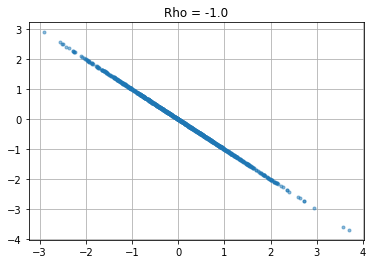

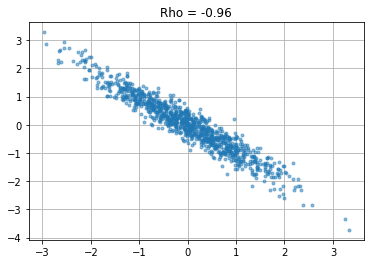

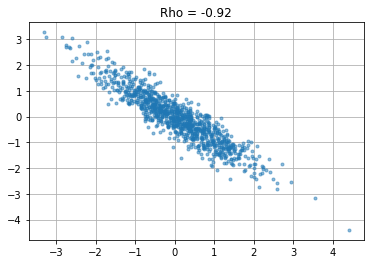

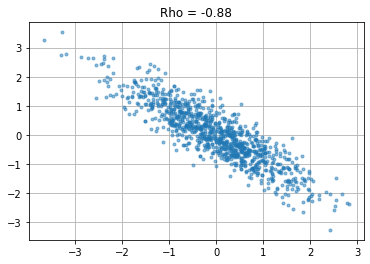

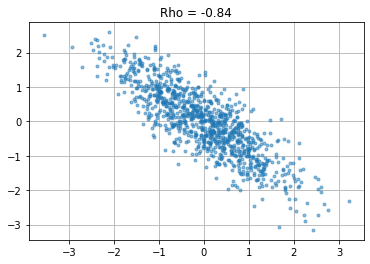

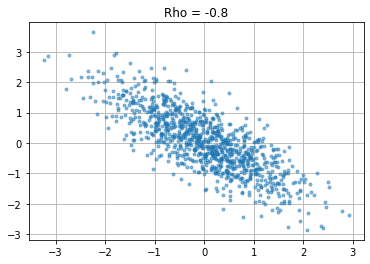

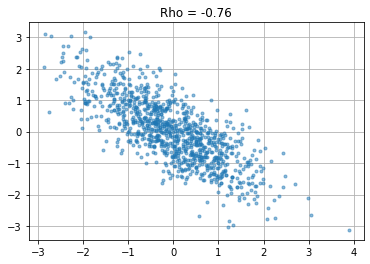

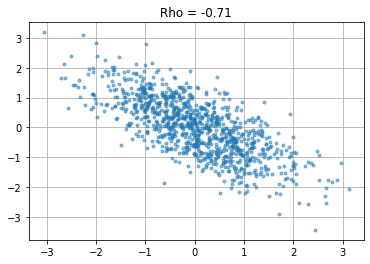

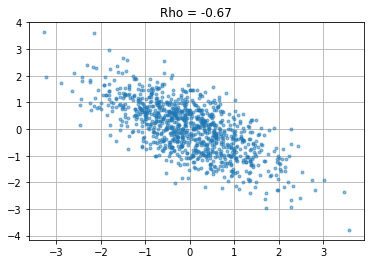

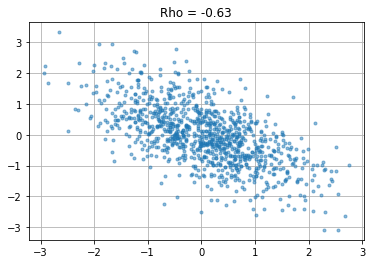

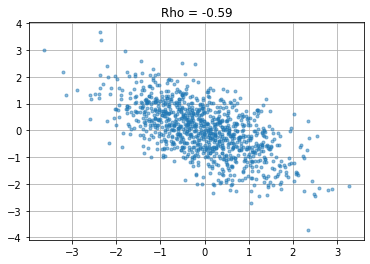

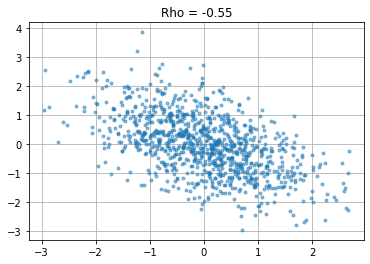

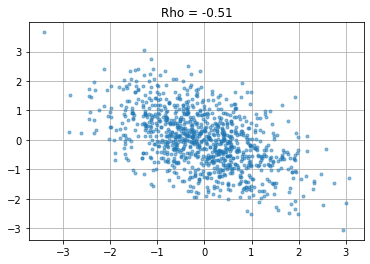

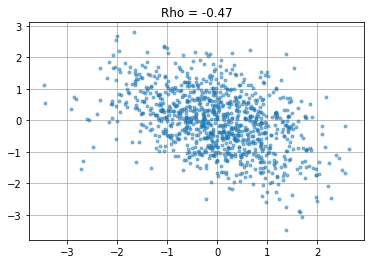

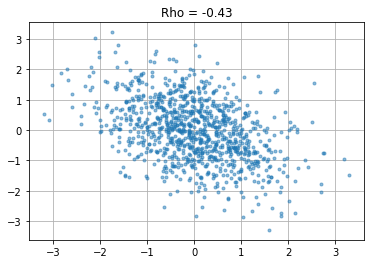

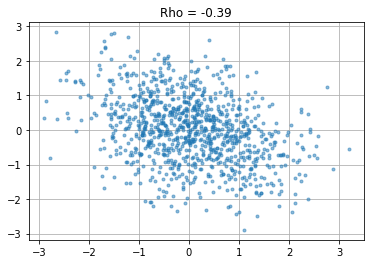

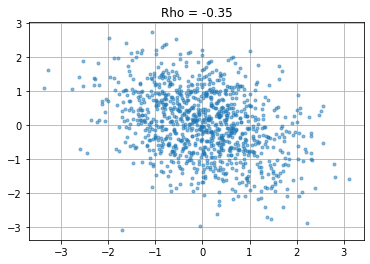

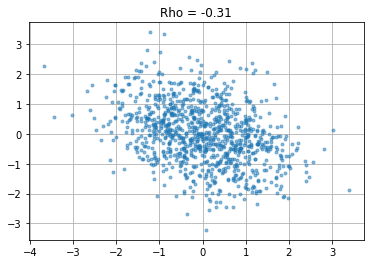

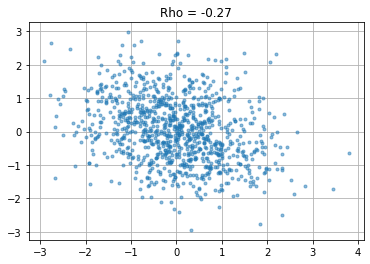

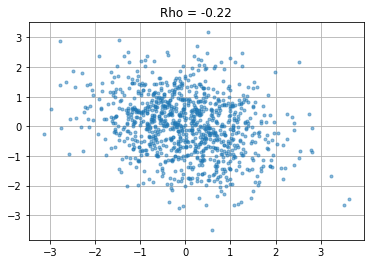

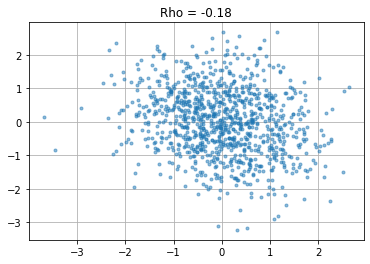

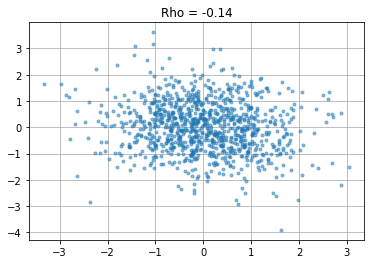

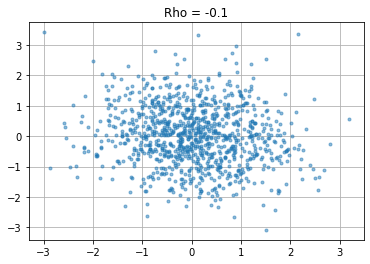

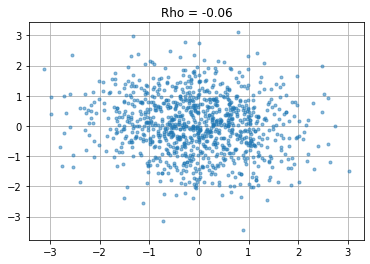

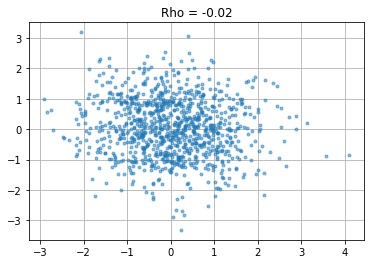

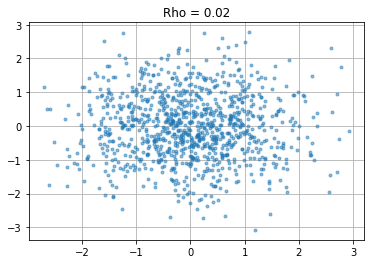

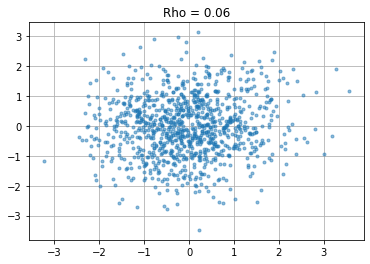

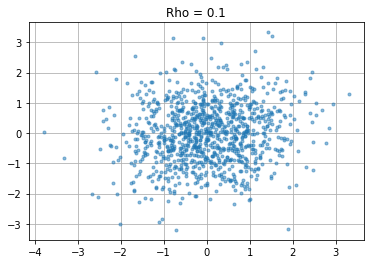

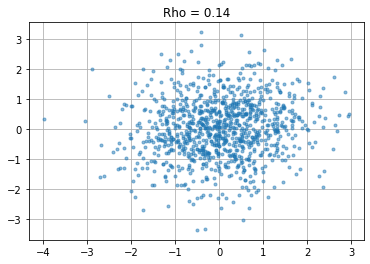

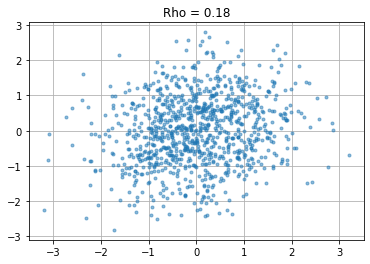

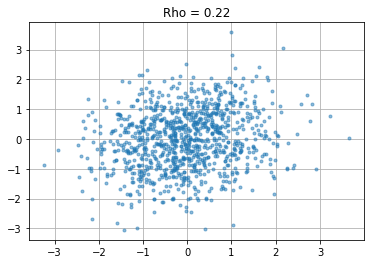

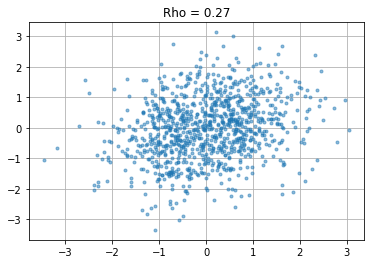

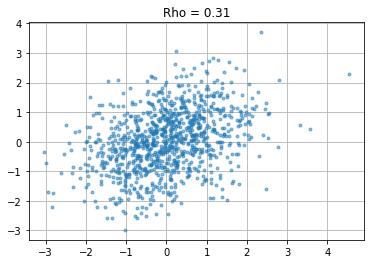

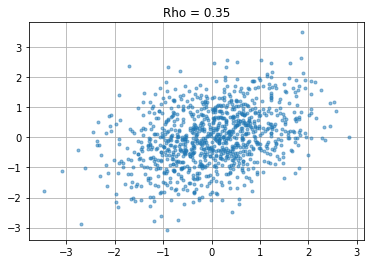

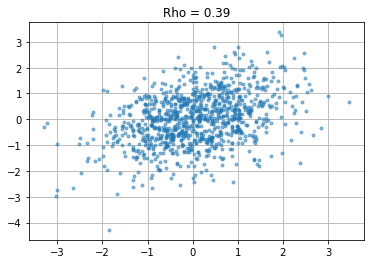

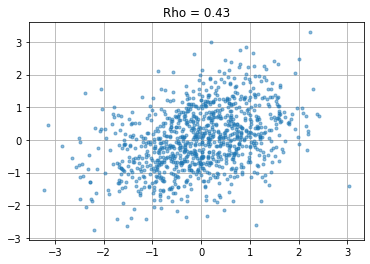

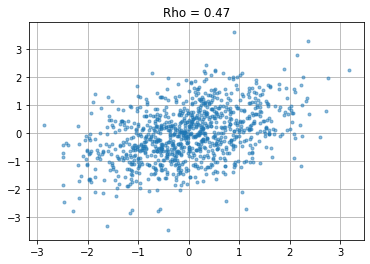

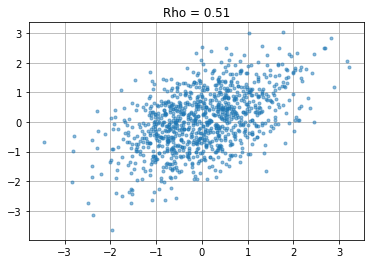

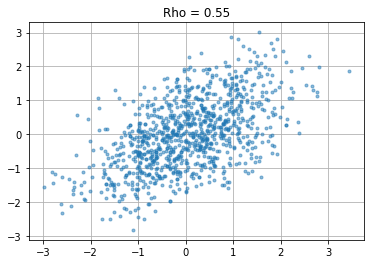

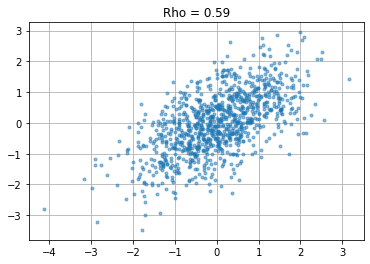

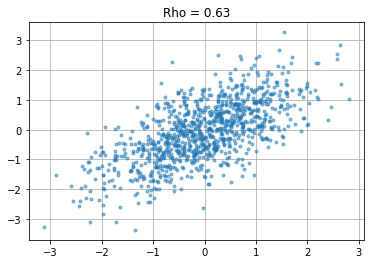

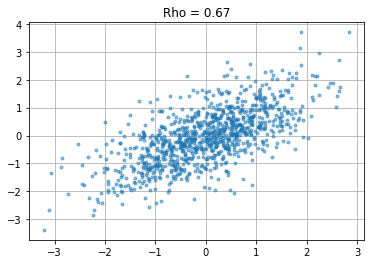

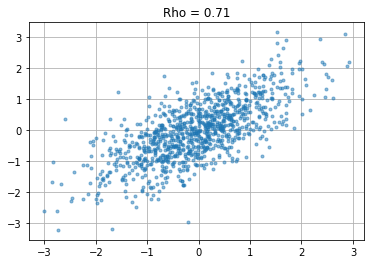

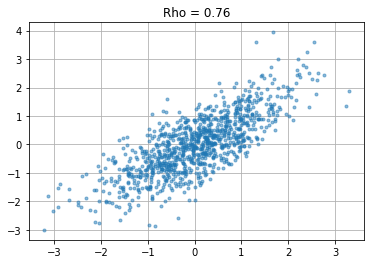

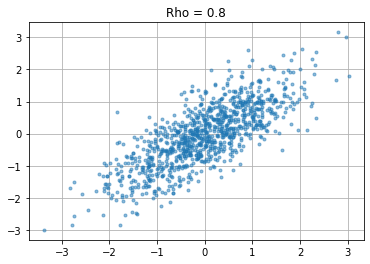

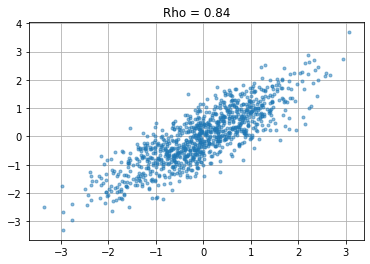

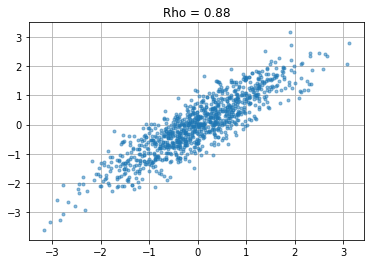

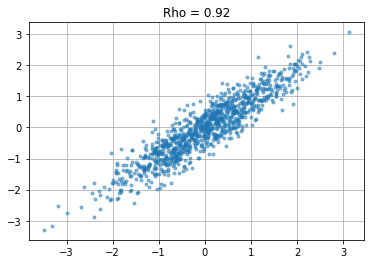

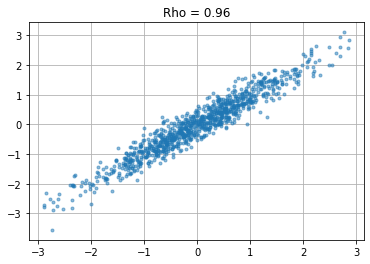

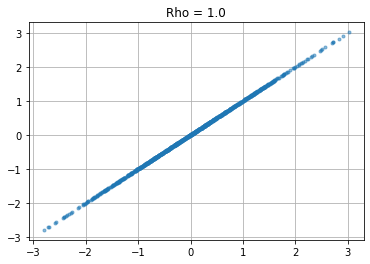

In [3]:
n = 1000 # tamaño de muestra
#rho = -0.23# Cantidad de correlación

filenames = []
index = 0
for rho in np.linspace(-1, 1, 50):
    sigma  = [[1, rho], [rho, 1]] ## Matriz de covarianzas
    X = np.random.multivariate_normal(mu, sigma, n) ### Estos son mis datos simulados
    plt.plot(X[:, 0], X[:, 1], '.', alpha = 0.5)
    plt.grid()
    plt.title("Rho = {}".format(np.round(rho, 2)))
    for i in range(5):
        filename = "{}.png".format(index)
        filenames.append(filename)
        # filename = f"{index}.png"
        plt.savefig(filename)
        index = index + 1
    #
    plt.show()
    plt.close()
    #plt.title(f"rho= {rho}") # Esta es otra forma de colocar el mismo titulo

In [8]:
import imageio as imageio

## compilar gif
with imageio.get_writer("mygif.gif", mode = "I") as escritor:
    for filename in filenames:
        image = imageio.imread(filename)
        escritor.append_data(image)
        


In [ ]:
## Elimar los .png para que no ocupen espacio
for filename in set(filenames):
    os.remove(filename)


In [ ]:
## Generemos una estructura de dependencia: Normal Bivariante
mu = [0, 0] # Vector de medias
rho = 0.1 # Cantidad de correlación

sigma  = [[1, rho], 
          [rho, 1]] ## Matriz de covarianzas

n = 1000 # Cantidad de datos, tamño de muestra
X = np.random.multivariate_normal(mu, sigma, n)
#plt.plot(X[:, 0], X[:, 1], '.', alpha = 0.5) ## Así hacemos un scatter plot, 


In [ ]:
from scipy.stats import spearmanr, kendalltau
## Calculando correlaciones
cor_p = np.corrcoef(X[:, 0], X[:, 1])[0, 1] ### Correlación de Pearson

### Calculando correlaciones robustas
cor_sp, _ = spearmanr(X[:, 0], X[:, 1])

### Segundo metodo robusto
cor_k, _ = kendalltau(X[:, 0], X[:, 1])

print(cor_p, cor_sp, cor_k)

0.06717205718640666 0.07005121005121005 0.04727927927927929


0.7763129322594003 1.0 1.0


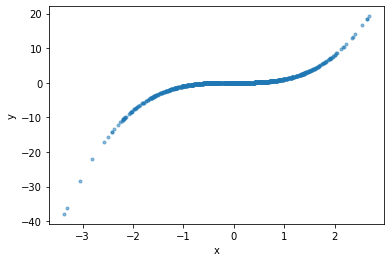

In [ ]:
x = np.random.normal(0, 1, 1000)
y = x**3
plt.plot(x, y, '.', alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y")

cor_p = np.corrcoef(x, y)[0, 1] ### Correlación de Pearson
cor_sp, _ = spearmanr(x, y)
cor_k, _ = kendalltau(x, y)

print(cor_p, cor_sp, cor_k)

## Relación entre Kendall y Spearman

In [ ]:
coeficientes = np.linspace(-1, 1, 1000)

v_cor_p = np.zeros(len(coeficientes))
v_cor_sp = np.zeros(len(coeficientes))
v_cor_k = np.zeros(len(coeficientes))

#print(v_cor_p)
i = 0
for rho in coeficientes:
    sigma  = [[1, rho], [rho, 1]] ## Matriz de covarianzas
    X = np.random.multivariate_normal(mu, sigma, n) ### Estos son mis datos simulados
    
    v_cor_p[i] = np.corrcoef(X[:,0], X[:, 1])[0, 1]
    v_cor_sp[i], _ = spearmanr(X[:,0], X[:, 1])
    v_cor_k[i], _ = kendalltau(X[:,0], X[:, 1])
    
    #print(v_cor_p)
    i = i + 1

In [ ]:
print(v_cor_sp[497:503])
print(v_cor_k[497:503])

[-0.0316373  -0.04392505  0.01625651  0.07594138 -0.00639759 -0.02623113]
[-0.02110911 -0.02868068  0.01087087  0.05054254 -0.00493293 -0.01770971]


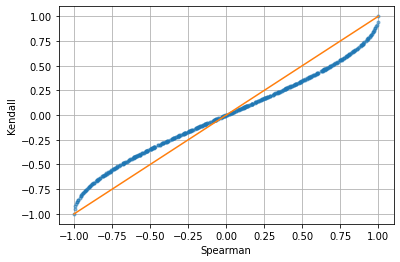

In [ ]:
plt.plot(v_cor_sp, v_cor_k, '.', alpha = 0.5)
plt.grid()
plt.xlabel("Spearman")
plt.ylabel("Kendall")
plt.plot([-1, 1], [-1, 1])

## La varianza Generalizada
Me indica que tan independientes son mis variables a partir de la matriz de covarianzas